[Dataset](https://www.kaggle.com/plameneduardo/sarscov2-ctscan-dataset) link

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

In [2]:
datapath = "../../../deeplearning/TensorFlow2.0_ResNet/dataset/"
print(os.path.exists(datapath))
image_dims = (180, 180)
batch_size = 64

True


In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = train_datagen.flow_from_directory(os.path.join(datapath, "train"),
                                             target_size = image_dims,
                                            batch_size = 128,
                                             class_mode = 'binary',
                                            color_mode = 'rgb',
                                                   shuffle=True)
test_generator = test_datagen.flow_from_directory(os.path.join(datapath, "test"), 
                                                             target_size = image_dims,
                                                              batch_size = 128,
                                                             class_mode = 'binary', 
                                                             color_mode = 'rgb')
validation_generator = validation_datagen.flow_from_directory(os.path.join(datapath, "valid"), 
                                                     target_size = image_dims,
                                                      batch_size = 128,
                                                     class_mode = 'binary', 
                                                     color_mode = 'rgb',
                                                             shuffle=True)


Found 1488 images belonging to 2 classes.
Found 495 images belonging to 2 classes.
Found 498 images belonging to 2 classes.


In [4]:
import matplotlib.pyplot as plt
import numpy as np

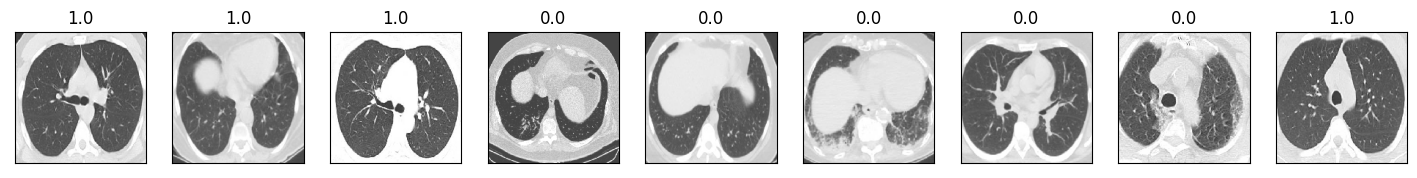

In [5]:
n = 10
plt.figure(figsize=(20, 4))
xtrain, ytrain = next(train_generator)
# samples = iter(enumerate(train_generator), n)
for i in range(1, n):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtrain[i])
    ax.title.set_text(ytrain[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [6]:
import tensorflow as tf
import keras

In [7]:
vgg_model = tf.keras.applications.VGG16(weights='imagenet',
                                      include_top=False,
                                        input_shape=(180, 180, 3)
                                      )
vgg_model.summary()
print(len(vgg_model.layers))
vgg_model.trainable=False 
x = vgg_model.layers[-1].output #
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(500, activation='relu')(x)
x = keras.layers.Dense(200, activation='relu')(x)
output = keras.layers.Dense(1)(x)

model = keras.Model(vgg_model.input, output)
model.summary()

58900480/58889256 [==============================] - 11s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 180, 180, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 180, 180, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 180, 180, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 90, 90, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 90, 90, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 90, 90, 128)       147584    
                                                             

In [8]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.BinaryAccuracy()]
)

In [9]:
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10
12/12 [==============================] - 188s 12s/step - loss: 16.3384 - binary_accuracy: 0.4980 - val_loss: 1.2545 - val_binary_accuracy: 0.5040
Epoch 2/10
12/12 [==============================] - 58s 5s/step - loss: 0.6170 - binary_accuracy: 0.5202 - val_loss: 0.5534 - val_binary_accuracy: 0.5100
Epoch 3/10
12/12 [==============================] - 58s 5s/step - loss: 0.2835 - binary_accuracy: 0.6183 - val_loss: 0.2823 - val_binary_accuracy: 0.5462
Epoch 4/10
12/12 [==============================] - 58s 5s/step - loss: 0.1703 - binary_accuracy: 0.7487 - val_loss: 0.1346 - val_binary_accuracy: 0.7892
Epoch 5/10
12/12 [==============================] - 58s 5s/step - loss: 0.1235 - binary_accuracy: 0.8589 - val_loss: 0.1103 - val_binary_accuracy: 0.8956
Epoch 6/10
12/12 [==============================] - 58s 5s/step - loss: 0.1058 - binary_accuracy: 0.8918 - val_loss: 0.0985 - val_binary_accuracy: 0.8976
Epoch 7/10
12/12 [==============================] - 63s 5s/step - loss: 0

In [10]:
test_loss, test_acc = model.evaluate(test_generator)
print('Accuracy:', test_acc)
print('Loss: ', test_loss)

4/4 [==============================] - 51s 16s/step - loss: 0.0780 - binary_accuracy: 0.9192
Accuracy: 0.9191918969154358
Loss:  0.07802782952785492


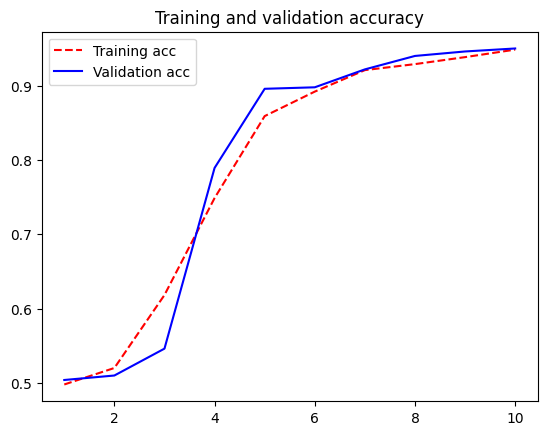

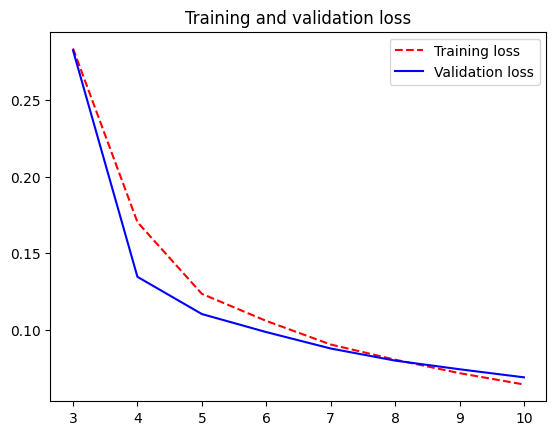

In [11]:
def plot_accuracy_and_loss(history):
    acc = history.history['binary_accuracy']
    val_acc = history.history['val_binary_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '--r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs[2:], loss[2:], '--r', label='Training loss')
    plt.plot(epochs[2:], val_loss[2:], 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

plot_accuracy_and_loss(history)

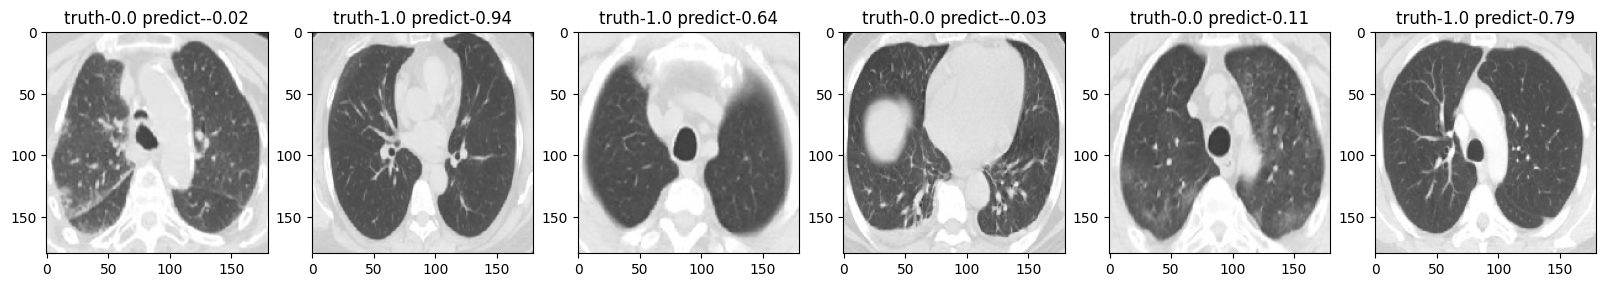

In [12]:
xtest, ytest = next(test_generator)
predictions = model.predict(xtest)
predictions = ['%.2f' %x for x in predictions] 

n = 6
plt.figure(figsize=(20, 4))
for i in range(1, n+1):
    ax = plt.subplot(1, n, i)
    plt.imshow(xtest[i])
    plt.gray()
    ax.title.set_text("truth-{0} predict-{1}".format((ytest[i]), (predictions[i]) ) )
    
plt.show()

In [13]:
model.save("models/vgg19/180-500-200-adam-mse-binaryacc-3")

INFO:tensorflow:Assets written to: models/vgg19/180-500-200-adam-mse-binaryacc-3/assets


In [14]:
vggModel = tf.keras.models.load_model("models/vgg19/180-500-200-adam-mse-binaryacc-3")

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [16]:
xtest, ytest = next(test_generator)
ypredict = vggModel.predict(xtest)

In [17]:
ypredict[ypredict >=0.5] = 1.0
ypredict[ypredict < 0.5] = 0.0

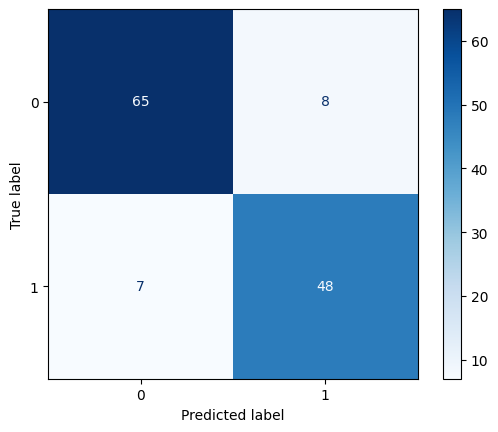

In [18]:
cm = confusion_matrix(ytest, ypredict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [19]:
import pandas as pd
from sklearn.metrics import recall_score ,precision_score,accuracy_score, f1_score,roc_auc_score


In [20]:
def binary_classification_performance(y_test, y_pred):
    tp, fp, fn, tn = confusion_matrix(y_test, y_pred).ravel()
    accuracy = round(accuracy_score(y_pred = y_pred, y_true = y_test),2)
    precision = round(precision_score(y_pred = y_pred, y_true = y_test),2)
    recall = round(recall_score(y_pred = y_pred, y_true = y_test),2)
    f1_score = round(2*precision*recall/(precision + recall),2)
    specificity = round(tn/(tn+fp),2)
    npv = round(tn/(tn+fn),2)
    auc_roc = round(roc_auc_score(y_score = y_pred, y_true = y_test),2)


    result = pd.DataFrame({'Accuracy' : [accuracy],
                         'Precision (or PPV)' : [precision],
                         'Recall (senitivity or TPR)' : [recall],
                         'f1 score' : [f1_score],
                         'AUC_ROC' : [auc_roc],
                         'Specificty (or TNR)': [specificity],
                         'NPV' : [npv],
                         'True Positive' : [tp],
                         'True Negative' : [tn],
                         'False Positive':[fp],
                         'False Negative':[fn]})
    return result


binary_classification_performance(ytest, ypredict)

,Accuracy,Precision (or PPV),Recall (senitivity or TPR),f1 score,AUC_ROC,Specificty (or TNR),NPV,True Positive,True Negative,False Positive,False Negative
0,0.88,0.86,0.87,0.86,0.88,0.86,0.87,65,48,8,7
